In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#importing the dataset and the headers of the columns
diabetes_df = pd.read_csv("pima_indians_diabetes_dataset.csv", names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    int64 
 1   Glucose                   768 non-null    object
 2   BloodPressure             768 non-null    object
 3   SkinThickness             768 non-null    object
 4   Insulin                   768 non-null    object
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    object
 8   Outcome                   768 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 54.1+ KB


In [6]:
#converting object type column to numeric
diabetes_df['Glucose'] = pd.to_numeric(diabetes_df['Glucose'],errors='coerce')
diabetes_df['BloodPressure'] = pd.to_numeric(diabetes_df['BloodPressure'],errors='coerce')
diabetes_df['SkinThickness'] = pd.to_numeric(diabetes_df['SkinThickness'],errors='coerce')
diabetes_df['Insulin'] = pd.to_numeric(diabetes_df['Insulin'],errors='coerce')
diabetes_df['BMI'] = pd.to_numeric(diabetes_df['BMI'],errors='coerce')
diabetes_df['DiabetesPedigreeFunction'] = pd.to_numeric(diabetes_df['DiabetesPedigreeFunction'],errors='coerce')
diabetes_df['Age'] = pd.to_numeric(diabetes_df['Age'],errors='coerce')

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   762 non-null    float64
 2   BloodPressure             766 non-null    float64
 3   SkinThickness             764 non-null    float64
 4   Insulin                   760 non-null    float64
 5   BMI                       760 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       764 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [8]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,762.000000,766.000000,764.000000,760.000000,760.000000,762.000000,764.000000,768.000000
mean,3.845052,120.795276,69.204961,20.460733,78.634211,31.982500,0.469514,33.218586,0.348958
std,3.369578,31.976298,19.217395,15.950358,114.308624,7.904179,0.325778,11.735647,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,22.500000,32.000000,0.370500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.600000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
#copying he data set to other data set to update 0 and NaN value, except Outcome column
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                      11
BloodPressure                36
SkinThickness               231
Insulin                     382
BMI                          19
DiabetesPedigreeFunction      6
Age                           4
Outcome                       0
dtype: int64


In [11]:
#Filling the NaN values with mean or median
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)
diabetes_df_copy['Age'].fillna(diabetes_df_copy['Age'].median(), inplace = True)
diabetes_df_copy['DiabetesPedigreeFunction'].fillna(diabetes_df_copy['DiabetesPedigreeFunction'].median(), inplace = True)

In [12]:
diabetes_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


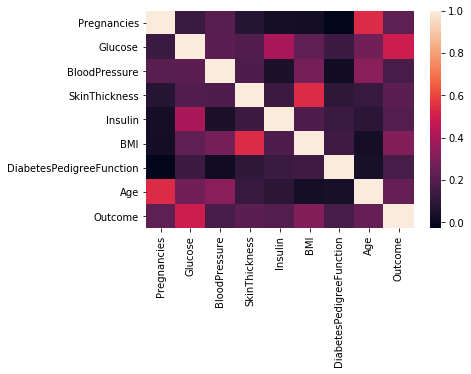

In [13]:
#checking the correlation between the columns of dataset
import seaborn as sns
sns.heatmap(diabetes_df_copy.corr())

In [14]:
#Standard scaling the dataset
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,8.717750e-01,-0.034711,0.676265,-0.176568,0.168190,0.487841,1.436024
1,-0.844885,-4.691457e-16,-0.531292,-0.008771,-0.176568,-0.854186,-0.362942,-0.187724
2,1.233880,2.027237e+00,-0.696819,-0.008771,-0.176568,-1.336163,0.626555,-0.102263
3,-0.844885,-1.076003e+00,-0.531292,-0.693807,-0.541729,-0.635105,-0.930130,-1.042328
4,-1.141852,5.086299e-01,-2.683141,0.676265,0.329946,1.555699,-0.302832,-0.016803


In [16]:
#copying the Outcome column
y = diabetes_df_copy.Outcome

In [18]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [19]:
#importing and applying KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [20]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 73.95833333333334 % and k = [5]


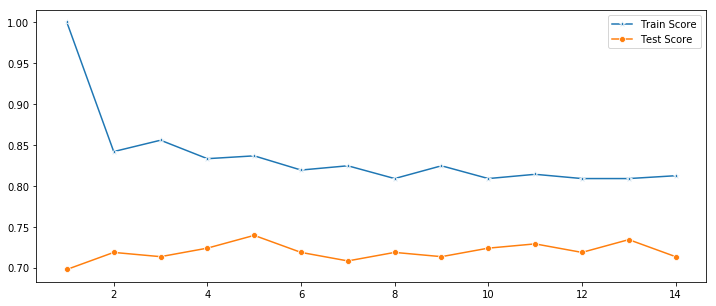

In [21]:
#plotting the result
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [22]:
#fitting the KNN model and getting the accuracy result
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7395833333333334

In [23]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#getting the predictions using the KNN classifier
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,104,21,125
1,29,38,67
All,133,59,192


Text(0.5,15,'Predicted label')

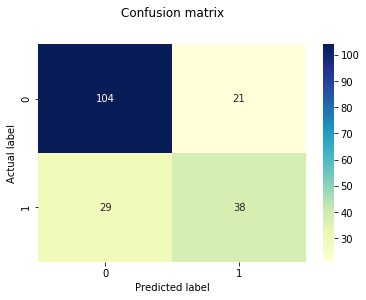

In [24]:
#graphing the confusion matrix
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
#importing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       125
           1       0.64      0.57      0.60        67

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.74      0.74       192



In [26]:
#plotting ROC Curve
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

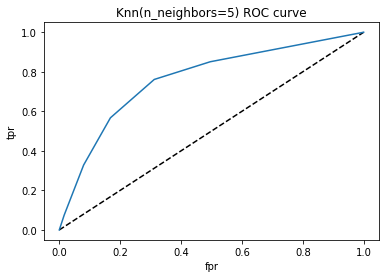

In [27]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [28]:
#importing and getting ROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.763223880597015

In [29]:
#importing NAive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [30]:
#fitting the model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
#predicting the results
y_pred = classifier.predict(X_test)

In [32]:
#checking f1 score and accuracy score
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[97 28]
 [25 42]]
0.6131386861313868
0.7239583333333334
